<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-file-and-review-the-general-information." data-toc-modified-id="Data-file-and-review-the-general-information.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data file and review the general information.</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Gaps" data-toc-modified-id="Gaps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaps</a></span></li><li><span><a href="#Rows-to-de-deleted" data-toc-modified-id="Rows-to-de-deleted-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rows to de deleted</a></span></li><li><span><a href="#Columns-that-have-gaps-but-are-left-for-further-analysis" data-toc-modified-id="Columns-that-have-gaps-but-are-left-for-further-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Columns that have gaps but are left for further analysis</a></span></li><li><span><a href="#Column-data-type" data-toc-modified-id="Column-data-type-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Column data type</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Eliminating-outliers" data-toc-modified-id="Eliminating-outliers-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Eliminating outliers</a></span></li></ul></li><li><span><a href="#Calculation-and-addition-of-new-columns-to-the-table" data-toc-modified-id="Calculation-and-addition-of-new-columns-to-the-table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculation and addition of new columns to the table</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Consideration-of-all-the-columns:" data-toc-modified-id="Consideration-of-all-the-columns:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Consideration of all the columns:</a></span></li><li><span><a href="#How-quickly-were-the-apartments-sold-(column-'days_exposition')" data-toc-modified-id="How-quickly-were-the-apartments-sold-(column-'days_exposition')-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>How quickly were the apartments sold (column 'days_exposition')</a></span></li><li><span><a href="#What-factors-most-influence-the-total-cost-of-a-property?-column-'last_price'" data-toc-modified-id="What-factors-most-influence-the-total-cost-of-a-property?-column-'last_price'-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>What factors most influence the total cost of a property? column 'last_price'</a></span></li><li><span><a href="#The-price-per-square-meter-in-10-localities" data-toc-modified-id="The-price-per-square-meter-in-10-localities-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>The price per square meter in 10 localities</a></span></li><li><span><a href="#Apartments-in-Saint-Petersburg-and-the-Distance-to-the-City-Center" data-toc-modified-id="Apartments-in-Saint-Petersburg-and-the-Distance-to-the-City-Center-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Apartments in Saint Petersburg and the Distance to the City Center</a></span></li><li><span><a href="#General-Conclusion" data-toc-modified-id="General-Conclusion-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>General Conclusion</a></span></li></ul></li></ul></div>

# Research of apartments advertisements for sale in St. Petersburg, Russia

I have at my disposal data from the Yandex.Real Estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

### Data file and review the general information.

In [1]:
#Importing libraries:
    
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import warnings
warnings.simplefilter("ignore")


In [2]:
#Let's open the data file:

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Let's study general information:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#I found an incorrect name cityCenters_nearest - Let's fix it:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})



In [5]:
#Let's look at the data, the first 15 lines:

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

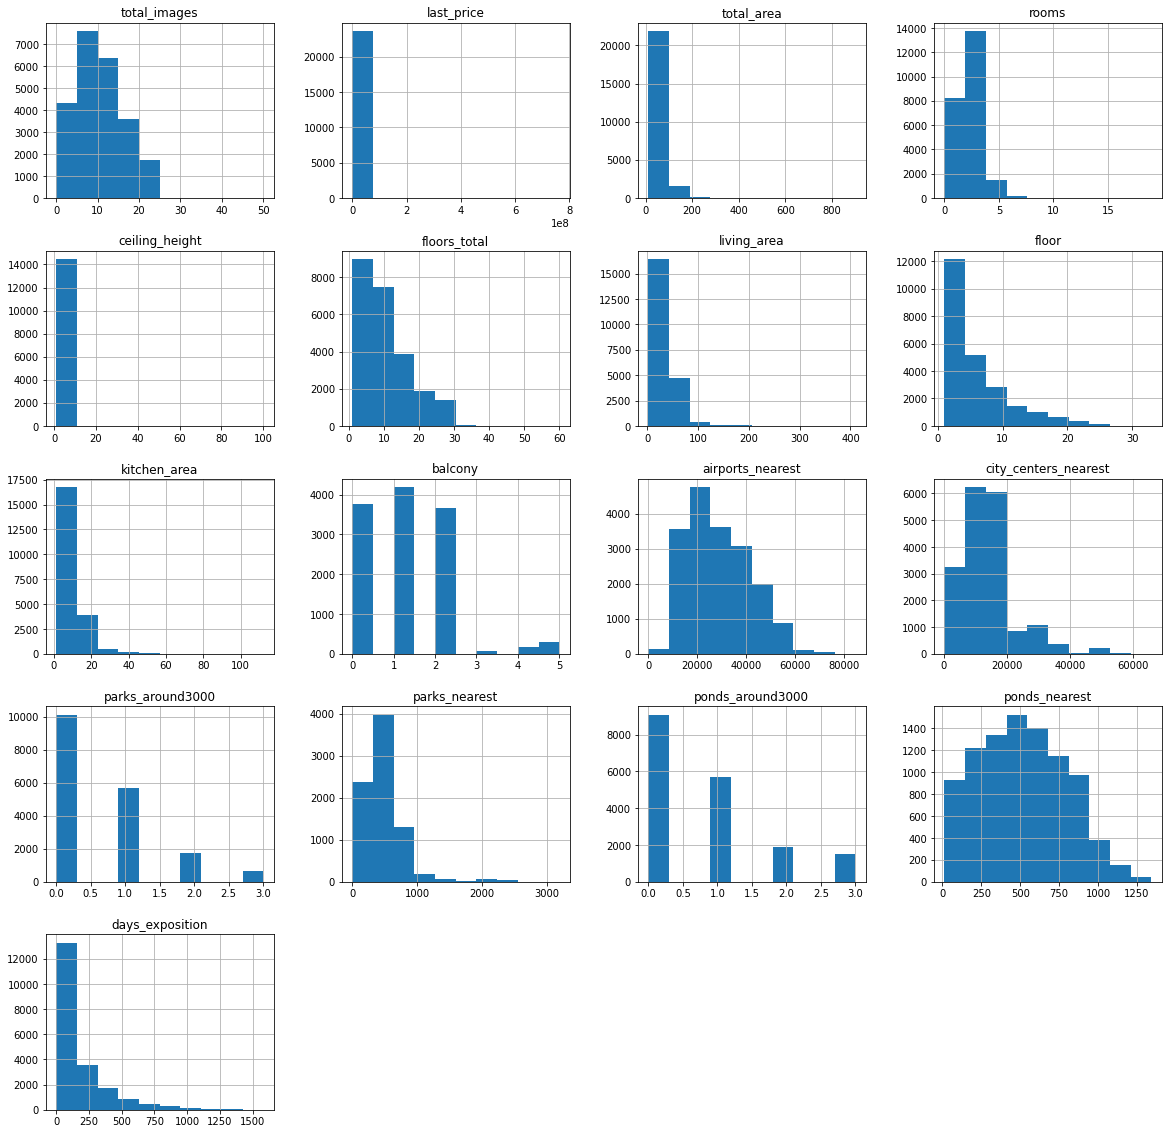

In [6]:
#Let's build a general histogram for all columns

data.hist(figsize=(20,20))

In [7]:
#Let's look at some brief information:

data.shape

(23699, 22)

There are 23699 lines in the data; during data preprocessing, we discard invalid data from the dataset (outliers, unreliable data, etc.). With 23.7 thousand records, I think it is uncritical to lose several hundred records

### Data preprocessing

#### Gaps

In [8]:
#Let's determine in which columns and how many gaps:

n = 0
for column in data.columns:
    if data[column].isna().sum() > 0:
        nan = data[column].isna().sum()
        print((data.columns[n], nan, (100*nan/len(data))))
    n += 1


('ceiling_height', 9195, 38.799105447487236)
('floors_total', 86, 0.36288450989493226)
('living_area', 1903, 8.029874678256467)
('is_apartment', 20924, 88.2906451749019)
('kitchen_area', 2278, 9.612219924891345)
('balcony', 11519, 48.605426389299126)
('locality_name', 49, 0.2067597788936242)
('airports_nearest', 5542, 23.384952951601335)
('city_centers_nearest', 5519, 23.28790244314106)
('parks_around3000', 5518, 23.2836828558167)
('parks_nearest', 15620, 65.90995400649817)
('ponds_around3000', 5518, 23.2836828558167)
('ponds_nearest', 14589, 61.55955947508334)
('days_exposition', 3181, 13.422507278788135)


Let's fill in the data, if possible:

Column 'is_apartment'

In terms of the number of gaps, the 'is_apartment' column, this field is often skipped during filling out information about rental housing, most likely this applies to rental housing in the private sector, where landlords are not sure whether their property is an apartment or not, they often do not understand this difference and therefore leave this field blank.

In the rental of commercial real estate, as a rule, this difference is known and accurately indicated, so I would not doubt the TRUE values. Therefore, we will fill all gaps with the default False values.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Column 'balcony'

If the number of balconies is not indicated, then most likely the apartment does not have it, let`s replace these gaps with 0:
Let's convert the data on the number of beams into integer values, since it is strange to measure them differently.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

Column 'living_area' and 'kitchen_area'

There are enough gaps in these columns; the sellers indicated the total area of the property, but did not indicate its distribution into residential/non-residential (kitchen area). We could fill in the missing information with median values. Since this is not for machine learning, and I think there is enough reliable data to answer the questions of the task.

Column 'ceiling_height'

In this column, already about 1/3 of all advertisements do not contain this information. Since this is not for machine learning, and I think there is enough reliable data to answer the questions of the task, if there is not enough data, then we will need to think about filling it out or contact the data provider. Here the gaps are explained by the fact that the authors of the advertisements did not indicate them.

#### Rows to de deleted

The data contains lines with incomplete data; if there are few of them, they do not have a significant impact on the results of the study, it is easier to delete them. For example, many landlords did not fill out information on apartments: ceiling height in the apartment, kitchen area, number of floors in the house, etc. . These lines are not very informative.

However, some information in these lines may be useful (for example, for calculating means or medians, for calculating the proportion of categorical indicators, etc.) Therefore, we will mark them “for deletion” and delete them at the end.

In [11]:
#Created a `to_delete` list for rows to be deleted.

to_delete = []

Column 'locality_name'

This information is important for research, but it's not in the 49 lines and there's nowhere to get it, so we delete them.

In [12]:
to_delete.extend(data['locality_name'].loc[data['locality_name'].isna()].index)

Column 'floors_total'
86 rows is not a large amount of data, I think we can delete them

In [13]:
to_delete.extend(data['floors_total'].loc[data['floors_total'].isna()].index)

#Let's check how many lines are to be deleted:
    
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 134


#### Columns that have gaps but are left for further analysis

Columns with lack of information by location
In several columns with location data, you can note similar data distinguishing dozens of rows. Most likely, for some rows, information is missing in several columns at the same time. These rows will not be possible to use for further analysis of the location, however, we cannot delete them, there are too many of them, about 20%

Most likely this happened due to a technical error during filling out the data; the location could not be determined automatically; this is unlikely to be a human factor.
We will need to fill the gap with NaN in order to preserve valuable information and not interfere with mathematical analysis methods.


Let's check the information on the days_exposition colomn: 

The data indicates the number of days during which the adv was posted, the absence of data in the column probably means that the adv has not been removed and this indicator has not been calculated

#### Column data type

Let's check the information on the floors_total colomn: 

Let's change the data type, for now only for non-empty values, which are defined by an integer.

In [14]:
data['floors_total'][~data['floors_total'].isna()] = data['floors_total'][~data['floors_total'].isna()].astype('int')

Let's check the information on the first_day_exposition colomn:

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


#### Duplicates

In [16]:
# Обрабатываем явные дубликаты

data.duplicated().sum()

0

There are no duplicate rows in the data

In [17]:
#Processing implicit duplicates in columns with names of settlements 'locality_name':

len(data['locality_name'].dropna().unique())


364

#### Eliminating outliers

Let's check the information on the ceiling_height colomn:

In [18]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

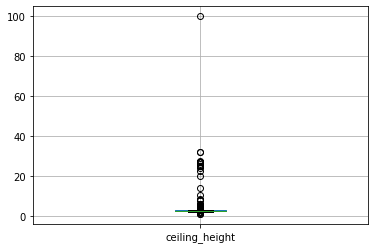

In [19]:
#The value of 100m is an outlier, let’s draw a graph:

data.loc[:,['ceiling_height']].boxplot() 

In [20]:
#let's see how many such apartments with ceilings of 100 m

data.loc[:,['ceiling_height']].loc[data['ceiling_height']==100]

,ceiling_height
22869,100.0


In [21]:
#Just one - we'll send it for deletion

to_delete.extend(data.loc[:,['ceiling_height']].loc[data['ceiling_height']==100].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 135


<AxesSubplot:>

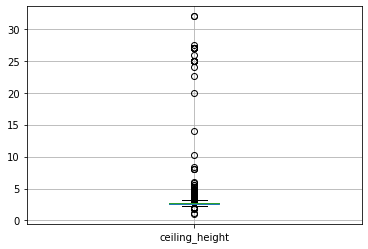

In [22]:
#Let's look at the histogram again
data.loc[:,['ceiling_height']].loc[data['ceiling_height']!=100].boxplot() 

There are still many large values ​​(more than 5 m) - most likely these are outliers.
Values less than 2 or more than 5 meters are rare - we will remove them

In [23]:
to_delete.extend(data.loc[:,['ceiling_height']].loc[(data['ceiling_height']<=2)|(data['ceiling_height']>=5)].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 185


For other columns containing numeric values, outliers and anomalies will be processed:

1. General assessment: range of variation, mean and median values, spread of values and quartile boundaries.

2. Visual assessment of graphs.

3. Determine statistical outliers

Let's check the information on the total_area colomn: 

In [24]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

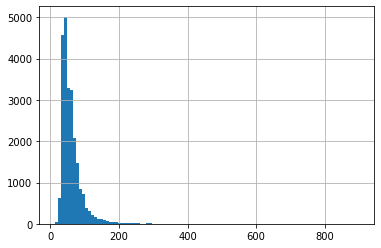

In [25]:
# The value of 900m is an outlier; Let's build a histogram:

data['total_area'].hist(bins=100)

In [26]:
#values greater than 300 are insignificant; they can be removed:

to_delete.extend(data['total_area'][data['total_area']>350].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 225


Let's check the information on the living_area colomn:  

In [27]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

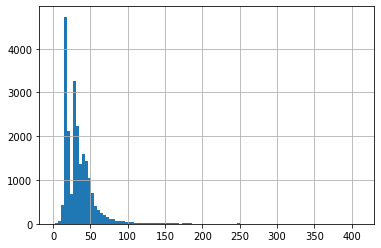

In [28]:
data['living_area'].hist(bins=100)

In [29]:
# values greater than 200 are insignificant; they can be removed:

to_delete.extend(data['living_area'][data['living_area']>200].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 233


Let's check the information on the kitchen_area colomn:  

In [30]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

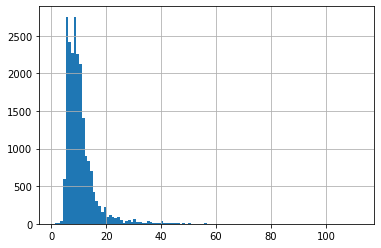

In [31]:
data['kitchen_area'].hist(bins=112)

In [32]:
# values greater than 60 are insignificant; they can be deleted:
to_delete.extend(data['kitchen_area'][data['kitchen_area']>60].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 252


Let's check the information on the balcony colomn: 

In [33]:
data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

The largest number of balconies is 5 - this is not such a big deal to throw out the rest of the data, of course the number of balconies is different in each apartment, mostly these are apartments without balconies or with only one. Let's see how many apartments have more than 4 balconies or more.

In [34]:
many_balcony = len(data['balcony'][data['balcony']>4])
print(many_balcony)

304


There are 304 such apartments - too many to throw them out.

Let's check the information on the floor colomn: 

In [35]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

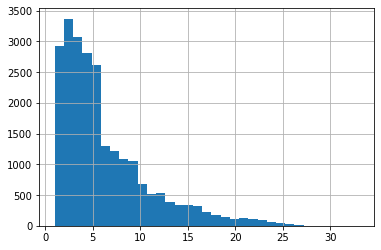

In [36]:
data['floor'].hist(bins=33)

The spread is small and plausible - we can leave the data for further analysis

Let's check the information on the floors_total colomn: 

In [37]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

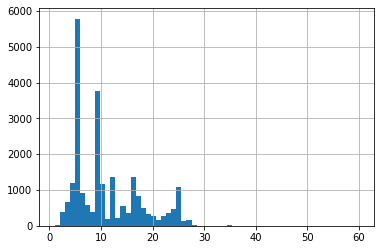

In [38]:
data['floors_total'].hist(bins=60)

In [39]:
#values greater than 30 are insignificant; they can be deleted:
to_delete.extend(data['floors_total'][data['floors_total']>30].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 282


Let's check the information on the last_price column:

In [40]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

We should be very careful about the price data, this is a very subjective value. We can only delete premium segment apartments, since there are few of them, we can check the number of lines with a price greater than 50 million.

In [41]:
luxery = len(data['last_price'][data['last_price']>50000000])
print(luxery)

131


In [42]:
#I think 131 is not a lot and we can remove them and not take them into account in further analysis

to_delete.extend(data['last_price'][data['last_price']>50000000].index)
print('удалить строк:', len(pd.Series(to_delete).unique()))

удалить строк: 371


The number of rows to delete is quite small; by deleting them we will improve the quality of the data for analysis. the data will be cleared of statistical outliers, anomalies, etc.
We will write the result into the data_clean and leave the original dataframe for comparison.

In [43]:
data_clean = data
data_clean.drop(labels = to_delete, axis = 0, inplace = True)
#Reset the indexes in the dataframe (we will write the original indexes in a separate column):
data_clean.reset_index(drop=False, inplace=True)


In [44]:
#Let's track the changes:

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23328 non-null  int64         
 1   total_images          23328 non-null  int64         
 2   last_price            23328 non-null  float64       
 3   total_area            23328 non-null  float64       
 4   first_day_exposition  23328 non-null  datetime64[ns]
 5   rooms                 23328 non-null  int64         
 6   ceiling_height        14315 non-null  float64       
 7   floors_total          23328 non-null  float64       
 8   living_area           21489 non-null  float64       
 9   floor                 23328 non-null  int64         
 10  is_apartment          23328 non-null  bool          
 11  studio                23328 non-null  bool          
 12  open_plan             23328 non-null  bool          
 13  kitchen_area    

371 rows were removed from the dataframe, which is less than 2% of the total number of rows; this will not affect the reliability of further research

### Calculation and addition of new columns to the table

Price per square meter

In [45]:
#Найдем цену и запишем полученные значения в новый столбец :
data_clean['price_m2'] = data_clean['last_price'] / data_clean['total_area'] /1000
data_clean['price_m2'].describe()

count    23328.000000
mean        97.553207
std         39.469300
min          0.111835
25%         76.457214
50%         94.786730
75%        113.761468
max        848.484848
Name: price_m2, dtype: float64

Day of the week the adv was published

In [46]:
#Добавляем столбец с днями недели:
data_clean['weekday'] = data_clean['first_day_exposition'].dt.weekday


Month of publication of the adv

In [47]:
data_clean['month'] = data_clean['first_day_exposition'].dt.month

Year the adv was published

In [48]:
data_clean['year'] = data_clean['first_day_exposition'].dt.year

Apartment floor type

In [49]:
#Let's fill in the floor type using a loop. Create an empty list:
floor_type = []

for index in range(data_clean['floor'].count()):
    if data_clean['floor'][index] == 1:
        floor_type.append('первый')
    elif data_clean['floor'][index] == data_clean['floors_total'][index]:
        floor_type.append('последний')
    else:
        floor_type.append('другой')

#Adding a column to the dataframe after the column'floors_total':
data_clean.insert(9, 'floor_type', floor_type, False)

data_clean.loc[:10,['floor_type','floor','floors_total']]

,floor_type,floor,floors_total
0,другой,8,16.0
1,первый,1,11.0
2,другой,4,5.0
3,другой,13,14.0
4,другой,5,12.0
5,другой,6,26.0
6,другой,22,24.0
7,другой,26,27.0
8,другой,7,9.0
9,другой,3,12.0


Distance to city center in kilometers

In [50]:
#We add a new column with the distance to the city center in km, not in m:
data_clean.insert(18, 'city_centers_nearest_km', round((data_clean['city_centers_nearest'] / 1000),0), False)
data_clean.loc[:10,['city_centers_nearest_km','city_centers_nearest']]

,city_centers_nearest_km,city_centers_nearest
0,16.0,16028.0
1,19.0,18603.0
2,14.0,13933.0
3,8.0,8098.0
4,NaN,NaN
5,19.0,19143.0
6,12.0,11634.0
7,NaN,NaN
8,15.0,15008.0
9,14.0,13878.0


### Exploratory Data Analysis

#### Consideration of all the columns:

Column 'total_area'

Most apartments have an area ranging from 30 to 75 sq.m.

<AxesSubplot:ylabel='Frequency'>

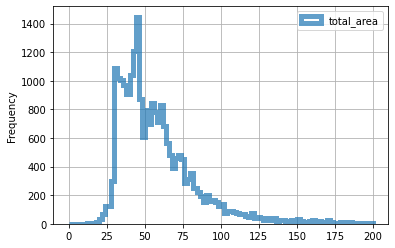

In [51]:
data_clean.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='total_area',
    grid=True,
    legend=True,
)

Column 'living_area'

Let's compare the total area and living space
The living area graph is shifted to the left of the total area graph and repeats it in shape, since the living area is smaller than the total area

<AxesSubplot:ylabel='Frequency'>

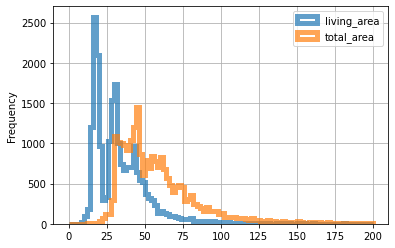

In [52]:
comparison = data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='living_area',
)
data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='total_area',
    ax=comparison,
    grid=True,
    legend=True,
)

Column 'kitchen_area'

The average kitchen area is 8-12 meters, only a small number of apartments have kitchens larger than 20 square meters, as a rule these are expensive luxury housing

<AxesSubplot:ylabel='Frequency'>

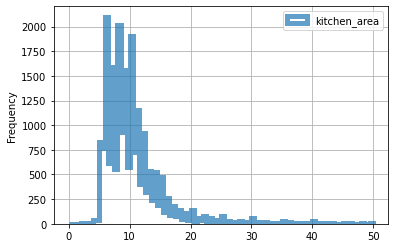

In [53]:
data_clean.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    range=(0, 50),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='kitchen_area',
    grid=True,
    legend=True,
)

Column 'last_price'

The graphs below show that the cost of an apartment strongly depends on the total area, although as these parameters increase, the dependence between them weakens.

<AxesSubplot:ylabel='Frequency'>

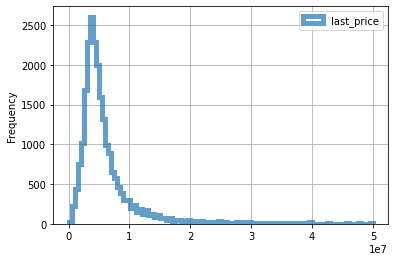

In [54]:
data_clean.plot(
    kind='hist',
    y='last_price',
    histtype='step',
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='last_price',
    grid=True,
    legend=True,
)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

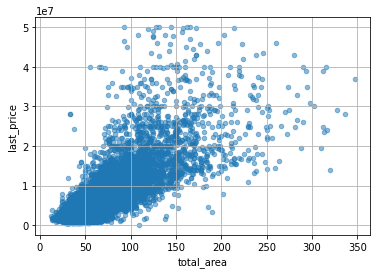

In [55]:
(data_clean.plot(
           x='total_area', 
           y='last_price', 
           kind='scatter', 
           grid=True, 
           alpha=0.5))

Column 'rooms'

Most apartments have 2-4 rooms 

<AxesSubplot:ylabel='Frequency'>

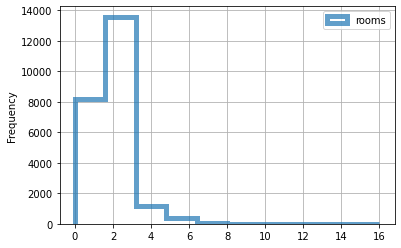

In [56]:
data_clean.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    bins=10,
    linewidth=5,
    alpha=0.7,
    label='rooms',
    grid=True,
    legend=True,
)

Column 'ceiling_height'

Most apartments have a ceiling height of 2.5 m. However, there are a sufficient number of apartments with high ceilings - above 3 m.

<AxesSubplot:>

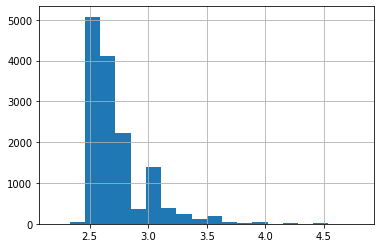

In [57]:
data_clean['ceiling_height'].hist(bins=20)

Column 'floor'

Most often they sell apartments in five-story buildings

<AxesSubplot:ylabel='Frequency'>

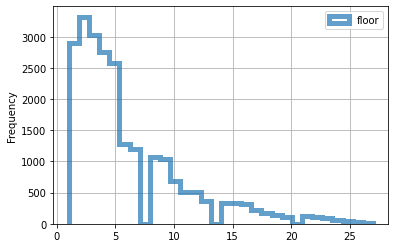

In [58]:
data_clean.plot(
    kind='hist',
    y='floor',
    histtype='step',
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='floor',
    grid=True,
    legend=True,
) 

Column 'floor_type'

The first and last floors constitute approximately 15% each of the apartments sold

<AxesSubplot:xlabel='floor_type'>

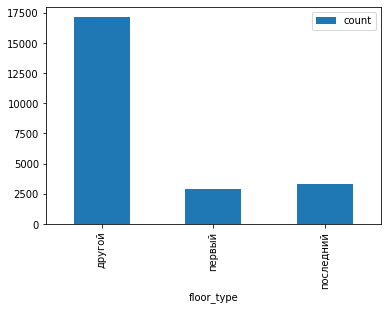

In [59]:
# let's create a counter column 
data_clean['count'] = 1
data_clean.pivot_table(index='floor_type', values='count', aggfunc='count').plot(kind='bar')

Column 'floors_total'

The advertisements mainly sell apartments in buildings with 5 and 9 floors

<AxesSubplot:>

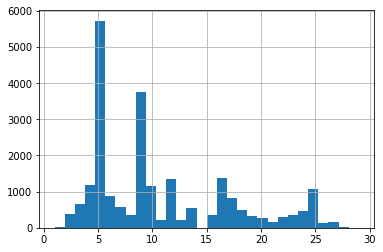

In [60]:
data_clean['floors_total'].hist(bins=30)

Column 'city_centers_nearest'

As can be seen from the graph, the cheapest apartments are located closest to the center, and the cheapest are the most distant from the center. The cheapest housing is the most distant from the center.

<AxesSubplot:xlabel='price_type'>

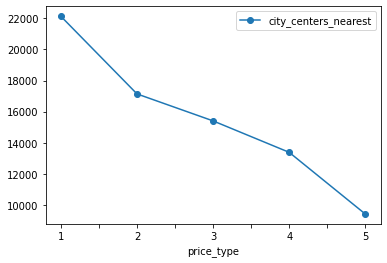

In [61]:
# сделаем категории по цене чтобы увидеть зависимость цены от расстояния квартиры до центра
data_clean['price_type'] = pd.qcut(data['last_price'], q=5, labels=[1,2,3,4,5], precision=0, duplicates='drop')

data_clean.pivot_table(index='price_type', values='city_centers_nearest', aggfunc='mean').plot(style='o-')

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

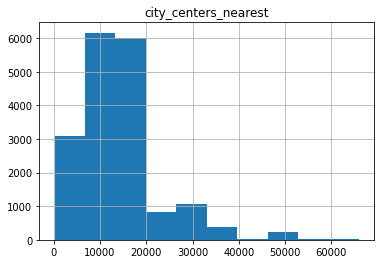

In [62]:
data_clean.loc[:,['city_centers_nearest']].hist()

Column 'airports_nearest'

As can be seen from the graph, the cheapest apartments are closest to the airport, and the cheapest are the farthest from it

<AxesSubplot:xlabel='price_type'>

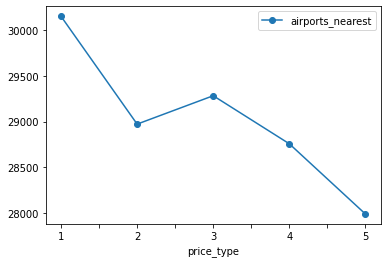

In [63]:
data_clean.pivot_table(index='price_type', values='airports_nearest', aggfunc='mean').plot(style='o-')

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

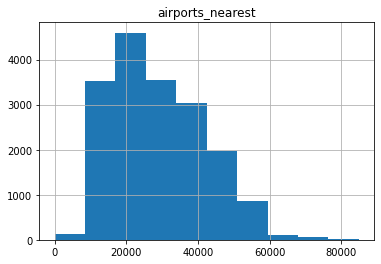

In [64]:
data_clean.loc[:,['airports_nearest']].hist()

Column 'parks_nearest'
As can be seen from the graph, the situation with parks is the opposite; the further from the city center, the more parks there are

<AxesSubplot:xlabel='price_type'>

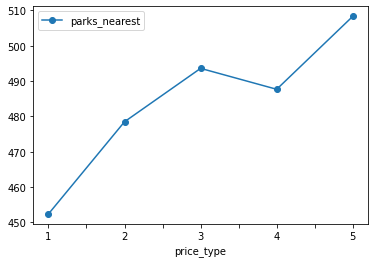

In [65]:
data_clean.pivot_table(index='price_type', values='parks_nearest', aggfunc='mean').plot(style='o-')

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

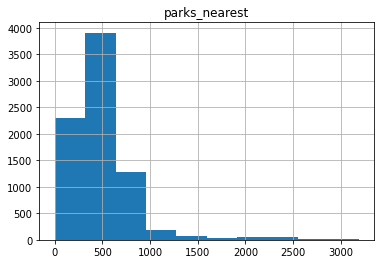

In [66]:
data_clean.loc[:,['parks_nearest']].hist()

Column 'weekday'
Most often, advertisements are posted on weekdays

<AxesSubplot:>

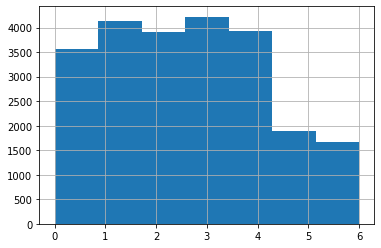

In [67]:
data_clean['weekday'].hist(bins=7)

Column 'month'

The fewest advertisements are posted during the New Year months (December and January), with a drop also seen during the vacation season

<AxesSubplot:>

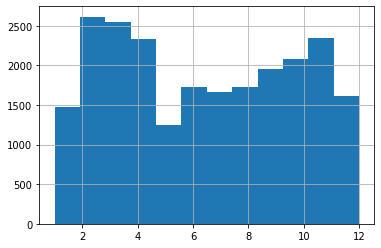

In [68]:
data_clean['month'].hist(bins=12)

#### How quickly were the apartments sold (column 'days_exposition')

In [69]:
#Let's keep the information where there are values in the column'days_exposition'

sold = data_clean[~data_clean['days_exposition'].isna()]
sold['days_exposition'].describe()

count    20209.000000
mean       180.010144
std        219.305756
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [70]:
#Let's find the median

sold['days_exposition'].median()

95.0

In [71]:
#Let's look at the mean

sold['days_exposition'].mean()

180.01014399524965

<AxesSubplot:>

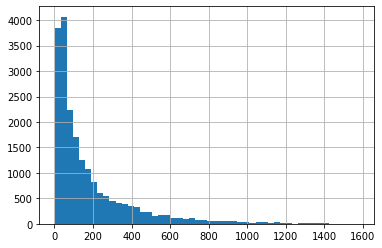

In [72]:
#Let's plot a histogram

sold['days_exposition'].hist(bins=50)

The graph above resembles a Poisson distribution. Now, let's visualize the median and quartiles on a box plot

<AxesSubplot:>

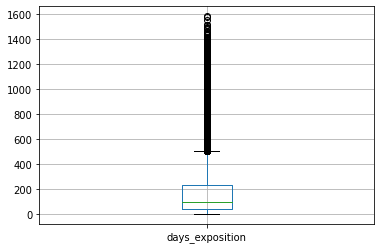

In [73]:
sold.loc[:,['days_exposition']].boxplot() 

<AxesSubplot:>

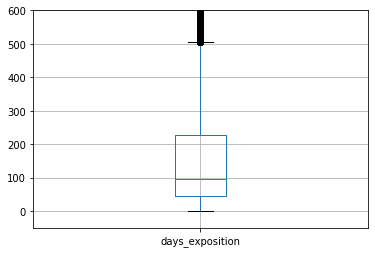

In [74]:
plt.ylim(-50, 600)
sold.loc[:,['days_exposition']].boxplot() 

The upper whisker cuts off sales that lasted more than 500 days. These data points are statistical outliers. We can check how many advertisements have this duration.

In [75]:
print(len(sold.loc[data_clean['days_exposition']>500*1.5]))

697


This is only 3-4% of the total number of apartments, let’s look at the graph without these apartments:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

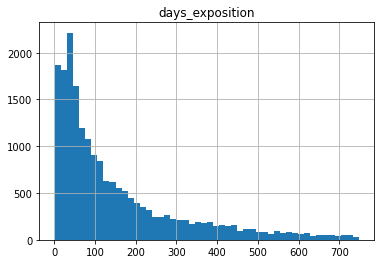

In [76]:
sold = sold.loc[data_clean['days_exposition']<500*1.5]
sold.loc[:,['days_exposition']].hist(bins=50)

In [77]:
sold['days_exposition_type'] = pd.qcut(sold['days_exposition'], q=3, labels=['быстрая продажа',\
'нормальная продажа','медленная продажа'], precision=0, duplicates='drop')
sold.pivot_table(index='days_exposition_type', values='days_exposition', aggfunc='max')

,days_exposition
days_exposition_type,
быстрая продажа,54.0
нормальная продажа,156.0
медленная продажа,748.0


Conclusion:
- apartments that take more than 500 days to sell are rather a deviation from the norm
- a quick sale is considered to be the sale of an apartment within 1-2 months
- 5-6 months is the normal period for selling an apartment
- 6-18 months is a long sale.

#### What factors most influence the total cost of a property? column 'last_price'

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

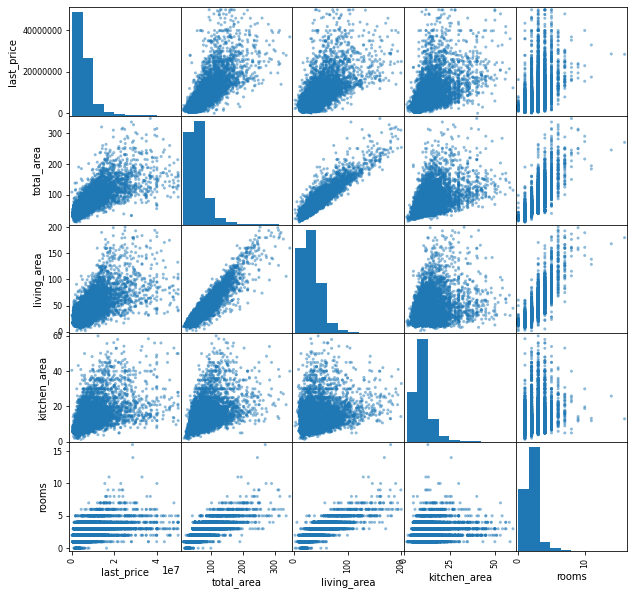

In [78]:
#Let's write down a list of factors that can affect the cost

factors=(['last_price',
       'total_area',
       'living_area',
       'kitchen_area',
       'rooms',
       #'floor_type',
       #'weekday',
       #'month',
       #'year'
      ])

#Let's look at the diagrams

pd.plotting.scatter_matrix(data_clean.loc[:,factors], figsize=(10, 10))

In [79]:
#Pearson correlation coefficient
data_clean.loc[:,factors].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.779419,0.682386,0.601729,0.501793
total_area,0.779419,1.000000,0.933369,0.574687,0.792649
living_area,0.682386,0.933369,1.000000,0.363022,0.871809
kitchen_area,0.601729,0.574687,0.363022,1.000000,0.226663
rooms,0.501793,0.792649,0.871809,0.226663,1.000000


Conclusion: the total area, living area, kitchen area greatly influence the price. The common and living areas are interconnected.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='last_price', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

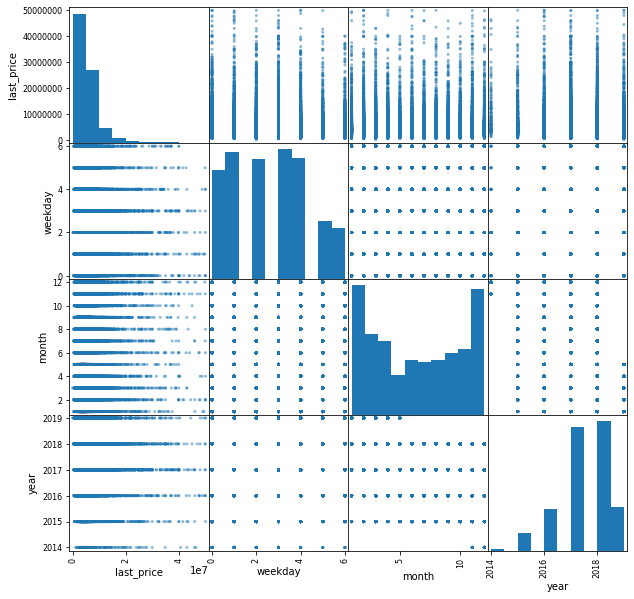

In [80]:
#Let's look at those factors that we have not yet considered

factors2=(['last_price',
          'floor_type',
          'weekday',
          'month',
          'year'
          ])

#Let's look at the diagrams

pd.plotting.scatter_matrix(data_clean.loc[:,factors2], figsize=(10, 10))

In [81]:
#Pearson correlation coefficient
data_clean.loc[:,factors2].corr()

,last_price,weekday,month,year
last_price,1.000000,-0.018389,0.003671,-0.046418
weekday,-0.018389,1.000000,0.012851,-0.001923
month,0.003671,0.012851,1.000000,-0.271082
year,-0.046418,-0.001923,-0.271082,1.000000


Conclusion: the price per square meter depends just a little bit on the floor category, day of the week, month and year of publication of the advertisement. The Pearson correlation coefficient is suitable for the relationship between area and cost, but for other parameters - type of floor, day of the week, year, and month - not very well, because the price of an apartment does not depend linearly on them; this can be seen from the graphs and matrix of correlation coefficients.

floor_type
другой       4800000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

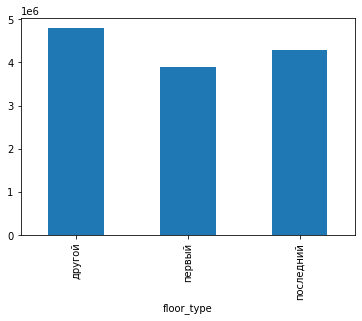

In [82]:
#In order to evaluate the dependencies of the floor category, day of the week, month and year, we will use the groupby method
price_floor = data_clean.groupby('floor_type')['last_price'].agg('median')
price_floor.plot.bar()
price_floor

Conclusion: From the graph, it can be seen that the price per square meter on the first floor is lower by approximately 20% compared to the price per square meter on other floors, while the price per square meter on the top floors is lower by approximately 10% compared to other floors.

weekday
0    4625000.0
1    4700000.0
2    4700000.0
3    4600000.0
4    4550000.0
5    4500000.0
6    4500000.0
Name: last_price, dtype: float64

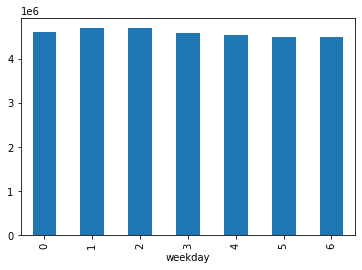

In [83]:
price_weekday = data_clean.groupby('weekday')['last_price'].agg('median')
price_weekday.plot.bar()
price_weekday

Conclusion: The price per square meter is almost independent of the day of the week the advertisement is posted

month
1     4600000.0
2     4650000.0
3     4650000.0
4     4780000.0
5     4500000.0
6     4400000.0
7     4600000.0
8     4550000.0
9     4690000.0
10    4550000.0
11    4680000.0
12    4650000.0
Name: last_price, dtype: float64

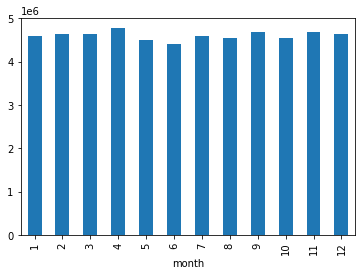

In [84]:
price_month = data_clean.groupby('month')['last_price'].agg('median')
price_month.plot.bar()
price_month

Conclusion: The price per square meter is almost independent of the month the advertisement is posted, though I have noted a slight decline in prices during the vacation season.

year
2014    7500000.0
2015    5250000.0
2016    4500000.0
2017    4500000.0
2018    4550000.0
2019    5000000.0
Name: last_price, dtype: float64

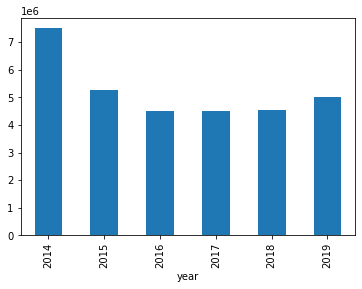

In [85]:
price_year = data_clean.groupby('year')['last_price'].agg('median')
price_year.plot.bar()
price_year

Conclusion: The price per square meter depends on the year the advertisement was posted. In 2014, the price per square meter was significantly higher than in other years, and it only began to recover in 2019, likely due to the economic crisis.

In [86]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    23328 non-null  int64         
 1   total_images             23328 non-null  int64         
 2   last_price               23328 non-null  float64       
 3   total_area               23328 non-null  float64       
 4   first_day_exposition     23328 non-null  datetime64[ns]
 5   rooms                    23328 non-null  int64         
 6   ceiling_height           14315 non-null  float64       
 7   floors_total             23328 non-null  float64       
 8   living_area              21489 non-null  float64       
 9   floor_type               23328 non-null  object        
 10  floor                    23328 non-null  int64         
 11  is_apartment             23328 non-null  bool          
 12  studio                   23328 n

#### The price per square meter in 10 localities

In [87]:
city_10 = data_clean['locality_name'].value_counts().index[0:10]
city_10

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [88]:
(data_clean.query('locality_name in @city_10').pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
.sort_values(by='price_m2',ascending=False))

,price_m2
locality_name,
Санкт-Петербург,112.220685
Пушкин,102.929681
деревня Кудрово,92.473548
посёлок Парголово,90.175913
посёлок Мурино,85.645903
посёлок Шушары,78.551345
Колпино,75.424579
Гатчина,68.757679
Всеволожск,68.719320


In [89]:
#The lowest price per square meter
filtred_data_clean = data_clean[data_clean['locality_name'].isin(city_10)]
min_price = filtred_data_clean.groupby('locality_name')['price_m2'].mean().min()
filtred_data_clean.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @min_price')



,price_m2
locality_name,
Выборг,58.238143


In [90]:
#The highest price per square meter

max_price = filtred_data_clean.groupby('locality_name')['price_m2'].mean().max()
filtred_data_clean.pivot_table(index='locality_name', values='price_m2', aggfunc='mean').query('price_m2 == @max_price')

,price_m2
locality_name,
Санкт-Петербург,112.220685


Conclusion: Among the 10 most popular localities where apartments are sold, the lowest prices per square meter are in Vyborg. The highest housing prices are in Saint Petersburg, which is very logical.

#### Apartments in Saint Petersburg and the Distance to the City Center

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='price_m2'>

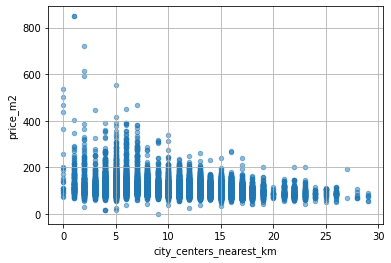

In [91]:
#Строим диаграмму рассеянья
(data_clean[data_clean['locality_name'] == 'Санкт-Петербург']
       .plot(
           x='city_centers_nearest_km', 
           y='price_m2', 
           kind='scatter', 
           grid=True, 
           alpha=0.5))

<AxesSubplot:xlabel='km'>

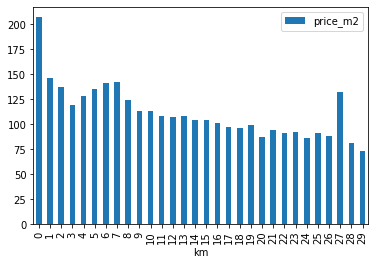

In [92]:
saint = (data_clean[data_clean['locality_name'] == 'Санкт-Петербург'].pivot_table(index='city_centers_nearest_km',
                                                                                  values='price_m2', aggfunc='mean'))
saint['km'] = saint.index.astype('int')
saint.plot( x='km', y='price_m2', kind='bar')

In [93]:
print(saint['km'].corr(saint['price_m2']))

-0.7833122748053649


The Pearson coefficient and the graphs confirm the dependency of the price per square meter on the distance from the city center of Saint Petersburg. The highest prices are for apartments within 8 kilometers of the center. However, there is a sharp spike at the 27-kilometer mark on the graph, which is likely due to apartments in the village of Lisiy Nos.

#### General Conclusion

We have obtained a large dataset on the real estate market of Saint Petersburg and its surroundings.

The initial data consisted of 23,699 rows. During data preprocessing, we discarded invalid data (outliers, unreliable data, etc.). Losing a few hundred records is not critical.

In preparing the data for analysis, we identified missing values, filled in data where possible without distorting further analysis, and changed the data types of some columns for convenience. We then analyzed the data for anomalies and outliers and identified the number of rows to be removed. This number was relatively small, 371, and removing them improved the quality of the data for analysis. The data was cleansed of statistical outliers, anomalies, and so on.

Next, we added the necessary information for analysis, including columns for:

- Price per square meter
- Date of advertisement publication
- Month of advertisement publication
- Year of advertisement publication
- Floor type of the apartment
- Distance in km to the city center

Following this, we proceeded with the analysis and found the following:

- Most apartments for sale have an area between 30 and 75 square meters.
- The average kitchen size is 8-12 square meters, with only a few apartments having kitchens larger than 20 square meters, typically expensive luxury housing.
- The price of an apartment strongly depends on its total area, though this dependency weakens as the area increases.
- Most apartments for sale have 2-4 rooms.
- Most apartments have a ceiling height of 2.5 meters. However, there is a significant number of apartments with high ceilings above 3 meters.
- Apartments in five-story buildings are most commonly sold.
- The first and last floors each account for approximately 15% of the apartments for sale.
- Most advertisements are for apartments in buildings with 5 or 9 floors.
- The most expensive apartments are closest to the city center, while the cheapest ones are the furthest away. The cheapest housing is maximally distant from the center.
- Apartments closest to the airport are more expensive than those further away.
- Advertisements are most frequently posted on weekdays.
- The fewest advertisements are posted during the New Year months (December and January), with a drop also seen during the vacation season.
- Apartments that take more than 500 days to sell are likely outliers. A quick sale is considered to occur within 1-2 months. A normal selling period is 5-6 months, while 6-18 months is considered a long time.
- The apartment area (total area, living area, kitchen area) greatly influences the price.
- The price per square meter on the first floor is approximately 20% lower compared to other floors, and the price per square meter on the top floors is about 10% lower than on other floors.
- The price per square meter is almost independent of the day of the week the advertisement is posted.
- The price per square meter is almost independent of the month of advertisement posting, although there is a slight decline during the vacation season.
- The price per square meter depends on the year the advertisement was posted. In 2014, the price per square meter was significantly higher than in other years, and it only began to recover in 2019, likely due to the economic crisis.
- Among the 10 most popular localities where apartments are sold, the lowest prices per square meter are in Vyborg. The highest prices are in Saint Petersburg.
- There is a strong dependence of the price per square meter on the distance from the city center of Saint Petersburg. The highest prices are for apartments within 8 kilometers of the center.

Now we have a very good understanding of the Saint Petersburg real estate market and can attempt to sell an apartment based on this knowledge.